<h1>PRAKTIKUM MODUL 3</h1>
<h3>soal</h3>
<ol>
<li>Melakukan dekomposisi citra ,menampilkan hasil dekomposisi citra pada level 3, 4, 5 dan seterusnya secara dinamis</li>
<li>Melakukan rekonstruksi dari hasil dekomposisi</li>
<li>Pada level berapa hasil dari dekomposisi berikut? berikan alasannya</li>
<li>Menampilkan representasi sinyal pada hasil dekomposisi pada nomor 3</li>
</ol>

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
import cv2 as cv

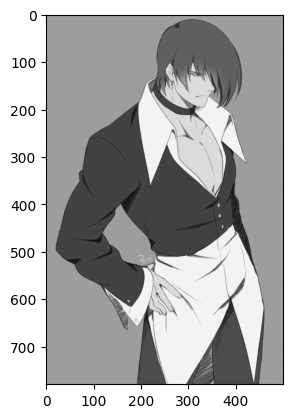

In [59]:
image = img.imread('IoriYagami.jpg')
gray_img = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
plt.imshow(gray_img, cmap='gray')

In [60]:
low_pass = np.array([0.7, 0.7])
high_pass = np.array([-0.7, 0.7])

In [61]:
def rowKonvolusi (kernel, img):
    padding = np.pad (img, [0, 1])
    tinggi, lebar =  img.shape
    konvolusi = np.zeros ((tinggi,lebar)) 
    for i in range (len(konvolusi)):
        for j in range (len(konvolusi[i])):
            for k in range (len(kernel)):
                konvolusi[i][j] += (padding[i][j+k]*kernel[k])
    return konvolusi

In [62]:
def colKonvolusi (kernel, img):
    tinggi, lebar =  img.shape
    padding = np.pad (img, [0, 1])
    konvolusi = np.zeros ((tinggi,lebar)) 
    for i in range (len(konvolusi)):
          for j in range (len(konvolusi[i])):
            for k in range (len(kernel)):
                konvolusi[i][j] += (padding[i+k][j]*kernel[k])
    return konvolusi


In [63]:
def rowSampling(img):
    tinggi,lebar=img.shape
    tinggi=int(tinggi/2)
    lebar=int(lebar)
    hasil = np.zeros((tinggi,lebar))
    index = 0
    for i in range(tinggi):
        for j in range(lebar):
            hasil[i][j] = img[index][j]
        index= index + 2
    return hasil

In [64]:
def colSampling(img):
    tinggi,lebar=img.shape 
    tinggi=int(tinggi)
    lebar=int(lebar/2)
    hasil = np.zeros((tinggi,lebar))
    for i in range(tinggi):
        index = 0
        for j in range(lebar):
            hasil[i][j] = img[i][index]
            index += 2
    return hasil

In [65]:
def dekomposisi(img, f1, f2):
    konvolusi1 = rowKonvolusi(f1, img)
    sampling = colSampling(konvolusi1)
    konvolusi2 = colKonvolusi(f2, sampling)
    hasil = rowSampling(konvolusi2)
    return hasil

In [66]:
LL = dekomposisi(gray_img, low_pass, low_pass)
HL = dekomposisi(gray_img, high_pass, low_pass)
LH = dekomposisi(gray_img, low_pass, high_pass)
HH = dekomposisi(gray_img, high_pass, high_pass)

In [67]:
def display (LL, LH, HL, HH):
    baris_1 = np.concatenate ((LL, HL), axis = 1)
    baris_2 = np.concatenate ((LH, HH), axis = 1)
    Hasil  = np.concatenate ((baris_1, baris_2), axis=0)
    return Hasil

In [68]:
def rentangPix(image, newMin=0, newMax=255):
    min = image.min()
    max = image.max()
    range = max - min
    newRange = newMax - newMin
    sesuaiImg = (((image - min) * newRange) / range) + newMin
    return sesuaiImg.astype('uint8')

Text(0.5, 1.0, 'hasil')

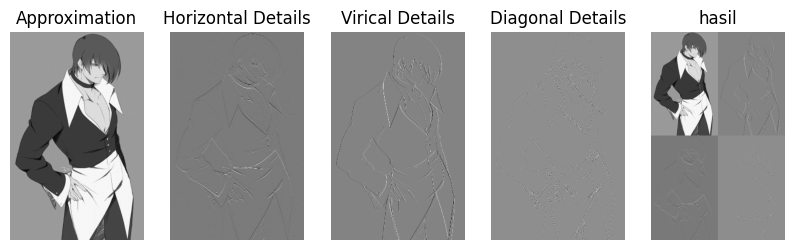

In [69]:
hasil = display(rentangPix(LL), rentangPix(LH), rentangPix(HL), rentangPix(HH))
img = plt.figure(figsize=(10, 7)) 
row = 1
col = 5
img.add_subplot(row, col, 1) 
plt.imshow(LL, cmap='gray')
plt.axis('off') 
plt.title("Approximation") 
img.add_subplot(row, col, 2) 
plt.imshow(LH, cmap='gray')
plt.axis('off') 
plt.title("Horizontal Details") 
img.add_subplot(row, col, 3) 
plt.imshow(HL, cmap='gray')
plt.axis('off') 
plt.title("Virical Details") 
img.add_subplot(row, col, 4) 
plt.imshow(HH, cmap='gray')
plt.axis('off') 
plt.title("Diagonal Details") 
img.add_subplot(row, col, 5) 
plt.imshow(hasil, cmap='gray')
plt.axis('off') 
plt.title("hasil")

In [70]:
def dilatasi(skala, img):
    tinggi, lebar = img.shape
    tinggi_baru = tinggi * skala
    lebar_baru = lebar * skala
    dilatasi = np.zeros((tinggi_baru, lebar_baru))
    
    for i in range(tinggi):
        for j in range(lebar):
            for k in range(skala):
                for l in range(skala):
                    dilatasi[i*skala+k][j*skala+l] = img[i][j]
                    
    return dilatasi

In [71]:
def level(img, f1, f2, level):
    LL = dekomposisi(img, f1, f1)
    LH = dekomposisi(img, f1, f2)
    HL = dekomposisi(img, f2, f1)
    HH = dekomposisi(img, f2, f2)
    LL = rentangPix(LL)
    LH = rentangPix(LH)
    HL = rentangPix(HL)
    HH = rentangPix(HH)
    hasil = display(LL, LH, HL, HH)
    for i in range(level-1):
        LH = dilatasi(2, LH)
        HL = dilatasi(2, HL)
        HH = dilatasi(2, HH)
        if i >= 1:
            hasil = display(hasil, HL, LH, HH)
        else:
            hasil = display(hasil, LH, HL, HH)
    return hasil

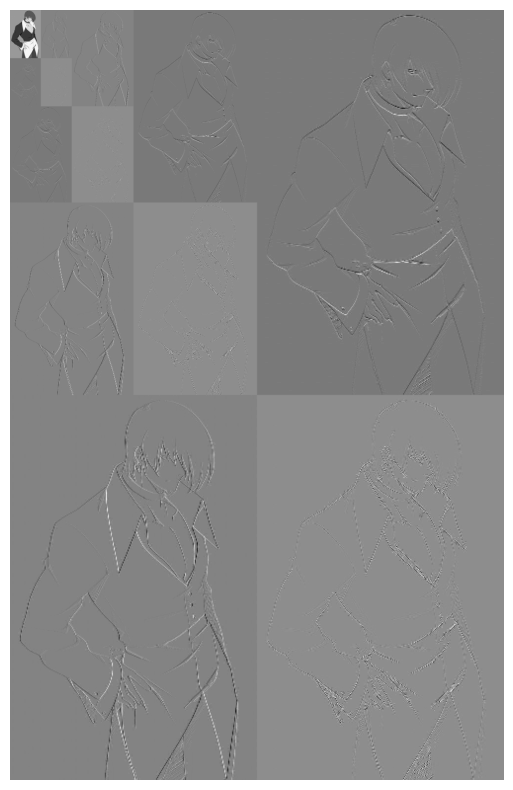

In [72]:
hasil = level(gray_img, low_pass, high_pass, 4)
fig = plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(hasil, cmap='gray')

In [73]:
def rekonstruksi(LL, LH, HL, HH):
    tinggi_img, lebar_img = LL.shape
    t = tinggi_img*2
    l = lebar_img*2
    image = np.zeros([t,l])
    for i in range(tinggi_img):
        for j in range(lebar_img):
            image[2*i][2*j] = LL[i][j]
            image[2*i][2*j+1] = LH[i][j]
            image[2*i+1][2*j] = HL[i][j]
            image[2*i+1][2*j+1] = HH[i][j]
    return image

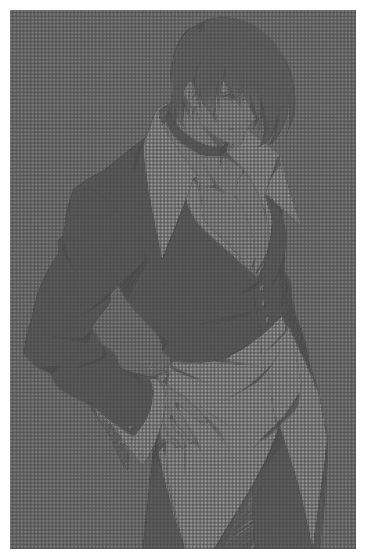

In [74]:
rekonstruksi = rekonstruksi(LL, LH, HL, HH)
fig = plt.figure(figsize=(10, 7))
plt.axis('off')
plt.imshow(rekonstruksi, cmap='gray')

Text(0.5, 1.0, 'Diagonal Details')

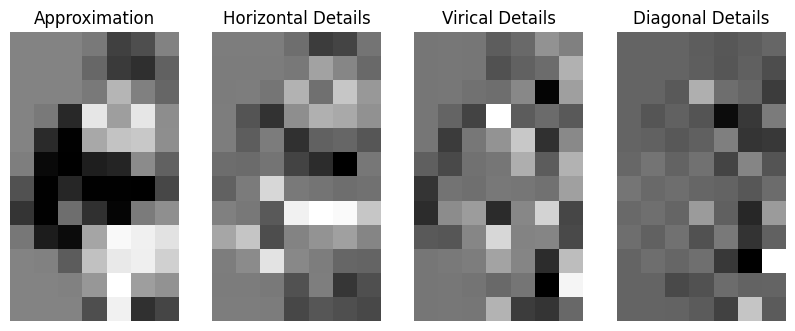

In [75]:
newLL = LL
newLH = LH
newHL = HL
newHH = HH
for i in range(5):
    newLL = dekomposisi(newLL, low_pass, low_pass)
    newLH = dekomposisi(newLH, low_pass, low_pass)
    newHL = dekomposisi(newHL, low_pass, low_pass)
    newHH = dekomposisi(newHH, low_pass, low_pass)

fig = plt.figure(figsize=(10, 7)) 
row = 1
col = 4

fig.add_subplot(row, col, 1) 
plt.imshow(newLL, cmap='gray')
plt.axis('off') 
plt.title("Approximation") 

fig.add_subplot(row, col, 2) 
plt.imshow(newLH, cmap='gray')
plt.axis('off') 
plt.title("Horizontal Details") 

fig.add_subplot(row, col, 3) 
plt.imshow(newHL, cmap='gray')
plt.axis('off') 
plt.title("Virical Details") 

fig.add_subplot(row, col, 4) 
plt.imshow(newHH, cmap='gray')
plt.axis('off') 
plt.title("Diagonal Details") 